## **About Aweshome**

Aweshome is a chatbot created by implementing machine learning in it. Its manufacture is carried out as an additional feature that will complement the smart home application created that also called Aweshome.
This application has a motto:

***Aweshome: Make your home smart and awesome ***

The chatbot feature will help users explicitly manage the appliances in their house, as well as to know the condition of their house.

# **Steps to create Aweshome Chatbot**

The following is an overview of the steps taken to create an Aweshome chatbot:
1. Prepare the required packages, including the Deep Learning, Tensorflow, Keras, Pickle, and NLTK (Natural Language Processing Toolkit) libraries.
2. Prepare a dataset in the form of a collection of user input and output that must be displayed in response to the Aweshome chatbot. The file is saved in JSON type and is named "intents."
3. Perform data preparation including import required packages, load the JSON file and extract the required data.
4. Creating models including training and testing models.
5. Integrating Aweshome chatbot with application.



In [ ]:
#code for import the packages
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
import os
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Embedding, LSTM , Dense,GlobalMaxPooling1D,Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [ ]:
#code for import the dataset that have been created in JSON format
with open('intents.json') as content:
  data1 = json.load(content)

In [ ]:
#code for getting all the data to lists
tags = []
patterns = []
responses={}
for intent in data1['intents']:
  responses[intent['tag']]=intent['responses']
  for lines in intent['patterns']:
    patterns.append(lines)
    tags.append(intent['tag'])

In [ ]:
#code for convert the data to dataframe
data = pd.DataFrame({"inputs":patterns,
                     "tags":tags})

In [ ]:
#code for print the data and get data sample
data
data = data.sample(frac=1)

In [ ]:
#code for remove punctuations
import string
data['inputs'] = data['inputs'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['inputs'] = data['inputs'].apply(lambda wrd: ''.join(wrd))
data

,inputs,tags
105,kamu bisa matikan lampu,lampu_mati
43,aku ingin dibantu,bantu
208,apakah pakaian sudah dikeluarkan,jemuran_keluar
224,keluarkan jemuran,jemuran_keluar
23,kenalin dong kamu ini siapa,nama
...,...,...
204,keluarkan jemurannya sekarang,jemuran_keluar
192,masukkan jemuran,jemuran_masuk
13,assalamualaikum warahmatullahi wabarakatuh,salam2
196,apakah jemuran sudah dikeluarkan,jemuran_keluar


In [ ]:
#code for tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])
#code for apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#code for encode the outputs
from sklearn.preprocessing import LabelEncoder
lbl_encoder = LabelEncoder()
y_train = lbl_encoder.fit_transform(data['tags'])

In [ ]:
input_shape = x_train.shape[1]
print(input_shape)

8


In [ ]:
#code for define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = lbl_encoder.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  161
output length:  15


In [ ]:
#code for create the model

i = Input(shape=(input_shape,))
x = Embedding(vocabulary+1,10)(i)
x = LSTM(12,return_sequences=True)(x)
x = LSTM(12,return_sequences=True)(x)
x = Flatten()(x)
x = Dense(output_length,activation="softmax")(x)
model  = tf.keras.Model(i,x)
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 8)]               0         
                                                                 
 embedding_2 (Embedding)     (None, 8, 10)             1620      
                                                                 
 lstm_2 (LSTM)               (None, 8, 12)             1104      
                                                                 
 flatten_2 (Flatten)         (None, 96)                0         
                                                                 
 dense_2 (Dense)             (None, 15)                1455      
                                                                 
Total params: 4,179
Trainable params: 4,179
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#code for compile the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [ ]:
#code for train the model
train = model.fit(x_train,y_train,epochs=100)

Epoch 1/100
8/8 [==============================] - 2s 7ms/step - loss: 2.7075 - accuracy: 0.0773
Epoch 2/100
8/8 [==============================] - 0s 6ms/step - loss: 2.6982 - accuracy: 0.2017
Epoch 3/100
8/8 [==============================] - 0s 6ms/step - loss: 2.6891 - accuracy: 0.2232
Epoch 4/100
8/8 [==============================] - 0s 6ms/step - loss: 2.6778 - accuracy: 0.2275
Epoch 5/100
8/8 [==============================] - 0s 6ms/step - loss: 2.6620 - accuracy: 0.2232
Epoch 6/100
8/8 [==============================] - 0s 6ms/step - loss: 2.6395 - accuracy: 0.2232
Epoch 7/100
8/8 [==============================] - 0s 7ms/step - loss: 2.6115 - accuracy: 0.1545
Epoch 8/100
8/8 [==============================] - 0s 6ms/step - loss: 2.5692 - accuracy: 0.1459
Epoch 9/100
8/8 [==============================] - 0s 8ms/step - loss: 2.5284 - accuracy: 0.1459
Epoch 10/100
8/8 [==============================] - 0s 6ms/step - loss: 2.4926 - accuracy: 0.1459
Epoch 11/100
8/8 [===========

Text(0.5, 1.0, 'Training Accuracy Model')

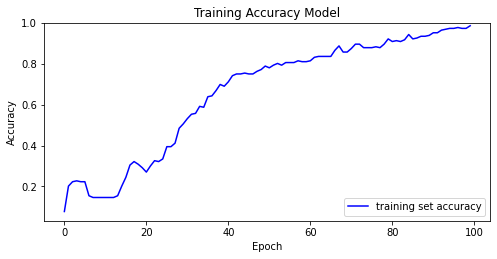

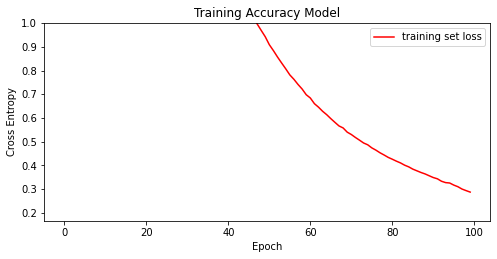

In [ ]:
#code for plot accuracy model
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(train.history['accuracy'],label='training set accuracy',color='blue')
plt.legend(loc='lower right')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy Model')

#code for plot loss model
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(train.history['loss'],label='training set loss',color='red')
plt.legend(loc='upper right')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training Accuracy Model')


In [ ]:
#code for save the model
model.save("chat_model")
import pickle

# saving
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)  

with open('label_encoder.pickle', 'wb') as ecn_file:
    pickle.dump(lbl_encoder, ecn_file, protocol=pickle.HIGHEST_PROTOCOL)

INFO:tensorflow:Assets written to: chat_model/assets


INFO:tensorflow:Assets written to: chat_model/assets


In [ ]:
# code for save model to h5 format 
model.save('./model.h5')

In [ ]:
# Code for save to tflite format
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)

converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.experimental_new_converter=True
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS, tf.lite.OpsSet.SELECT_TF_OPS]

tfmodel = converter.convert()
open('model.tflite', 'wb').write(tfmodel)

INFO:tensorflow:Assets written to: /tmp/tmp9x8mzm91/assets


INFO:tensorflow:Assets written to: /tmp/tmp9x8mzm91/assets


18848

In [ ]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

1 input(s):
[ 1 11] <class 'numpy.float32'>

1 output(s):
[ 1 14] <class 'numpy.float32'>


In [ ]:
#code for set the condition for input and output
import random

while True:
  texts_p = []
  prediction_input = input('You : ')

  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()
  response_tag = lbl_encoder.inverse_transform([output])[0]

  #finding the right tag and predicting
  response_tag = lbl_encoder.inverse_transform([output])[0]
  if response_tag == "kondisi_rumah":
    kondisiLampu = "nyala"
    kondisiPintu = "terkunci"
    kondisiJemuran = "aman"
    kondisiGas = "aman"
    print("Aweshome: Saat ini lampu dalam kondisi"{0}, "pintu dalam keadaan {1}, jemuran {2}, dan kompor gas dalam kondisi {3}".format(kondisiLampu, kondisiPintu, kondisiJemuran, kondisiGas))
  elif response_tag == "perpisahan":
    break
  else:
    print("Aweshome : ",random.choice(responses[response_tag]))  

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
import string
import random

def getSensor(kondisi_rumah): #kondisiLampu=False, kondisiPintu=False, kondisiJemuran=False
  kondisiLampu = kondisi_rumah[0] 
  kondisiPintu = kondisi_rumah[1] 
  kondisiJemuran = kondisi_rumah[2] 
  kondisiGas = kondisi_rumah[3] 
  #kondisiLampu
  if kondisiLampu==False:
    kondisiLampu='mati'
  else:
    kondisiLampu='nyala'
    #kondisiPintu
  if kondisiPintu==False:
    kondisiPintu='terbuka'
  else:
    kondisiPintu='terkunci'
  #kondisiJemuran
  if kondisiJemuran==False:
    kondisiJemuran='kehujanan'
  else:
    kondisiJemuran='aman'
  #kondisiGas
  if kondisiGas==False:
    kondisiGas='mati'
  else:
    kondisiGas='nyala'
  return kondisiLampu, kondisiPintu, kondisiJemuran, kondisiGas

def chat(user_text):
  texts_p = []
  #print('You : ', user_text)
  #removing punctuation and converting to lowercase
  prediction_input = [letters.lower() for letters in user_text if letters not in string.punctuation]
  prediction_input = ''.join(prediction_input)
  texts_p.append(prediction_input)

  #tokenizing and padding
  prediction_input = tokenizer.texts_to_sequences(texts_p)
  prediction_input = np.array(prediction_input).reshape(-1)
  prediction_input = pad_sequences([prediction_input],input_shape)

  #getting output from model
  output = model.predict(prediction_input)
  output = output.argmax()
  response_tag = lbl_encoder.inverse_transform([output])[0]

  #finding the right tag and predicting
  response_tag = lbl_encoder.inverse_transform([output])[0]
  if response_tag == "kondisi_lampu":
    lampu, pintu, jemuran, gas = getSensor()
    print("Aweshome: kondisi lampu", lampu, "kondisi pintu", pintu, "kondisi jemuran", jemuran, "kondisi gas", gas)
    text = input("You: ")
    chat(text)
  elif response_tag == "perpisahan":
    print("Aweshome : ",random.choice(responses['perpisahan']))
  else:
    print("Aweshome : ",random.choice(responses[response_tag]))
    text = input("You: ")
    chat(text)  

In [ ]:
getSensor([True, False, True, False])

('nyala', 'terbuka', 'aman', 'mati')

In [ ]:
inp = input("You: ")
chat(inp)

terima_kasih
Aweshome :  Sami-sami
kondisi_rumah


IndexError: ignored